<a href="https://colab.research.google.com/github/HopeRetina/btc_forecasting_LSTM/blob/main/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
!pip install Historic-Crypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies

In [6]:
Cryptocurrencies().find_crypto_pairs()

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
0,SWFTC-USD,SWFTC/USD,False,0.03000000,online
1,ADA-BTC,ADA/BTC,False,0.03000000,online
2,LRC-BTC,LRC/BTC,False,0.03000000,online
3,OCEAN-USD,OCEAN/USD,False,0.03000000,online
4,SUSHI-BTC,SUSHI/BTC,False,0.03000000,online
...,...,...,...,...,...
576,RNDR-USD,RNDR/USD,False,0.03000000,online
577,ATOM-EUR,ATOM/EUR,False,0.03000000,online
578,AVAX-USDT,AVAX/USDT,False,0.03000000,online
579,BOBA-USDT,BOBA/USDT,False,0.03000000,online


In [75]:
btc = HistoricalData('BTC-USD', 60*60*24, '2021-01-01-00-00', '2022-12-31-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2021-01-01T00:00:00
Provisional End: 2021-10-28T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2021-10-28T00:00:00
Provisional End: 2022-08-24T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2022-08-24T00:00:00
Provisional End: 2023-06-20T00:00:00
Data for chunk 3 of 3 extracted


In [76]:
btc

,low,high,open,close,volume
time,,,,,
2021-01-02,29039.00,33300.00,29413.29,32225.91,46675.246521
2021-01-03,32008.62,34810.00,32222.88,33080.66,36951.716506
2021-01-04,27678.00,33666.99,33082.84,32019.99,46045.389685
2021-01-05,29891.13,34499.67,32020.22,34030.64,42282.569200
2021-01-06,33352.54,37000.00,34043.91,36859.26,45744.103200
...,...,...,...,...,...
2022-12-27,16585.97,16967.00,16916.66,16698.73,17482.093188
2022-12-28,16460.00,16777.35,16698.31,16539.66,23345.551263
2022-12-29,16479.50,16654.81,16539.66,16627.54,20088.464875


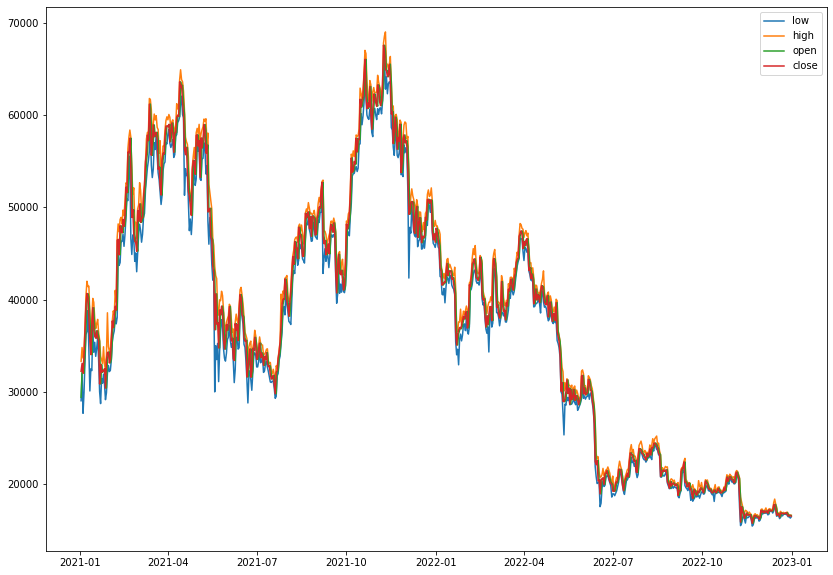

In [80]:
fig, ax = plt.subplots(figsize=(14, 10))

plt.plot(btc['low'], label = 'low')
plt.plot(btc['high'], label = 'high')
plt.plot(btc['open'], label = 'open')
plt.plot(btc['close'], label = 'close')

plt.legend()
# btc[['low', 'high', 'open', 'close']].plot.line();
plt.show()

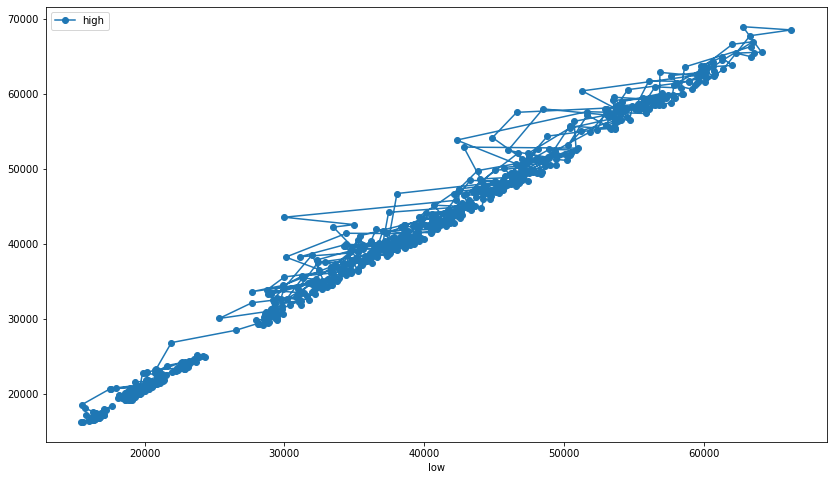

In [82]:
btc.plot.line(x='low', y='high', marker='o', figsize=(14, 8));

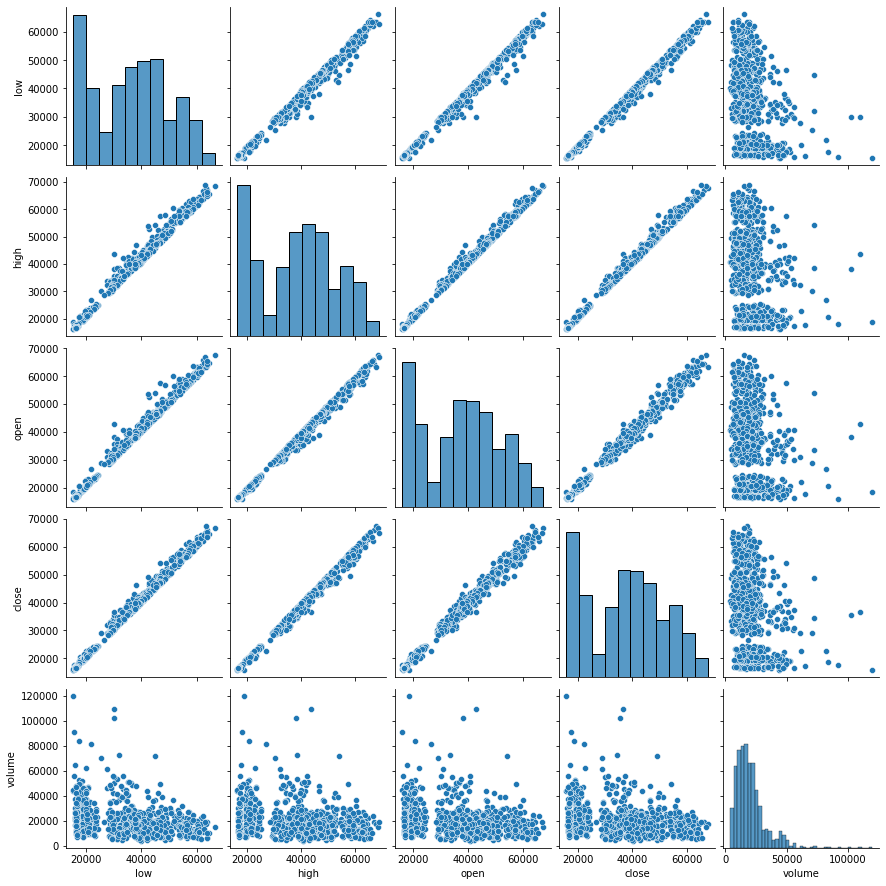

In [83]:
sns.pairplot(btc);

In [84]:
# Compute average

btc['price'] = btc[['low', 'high', 'open', 'close']].mean(axis=1)

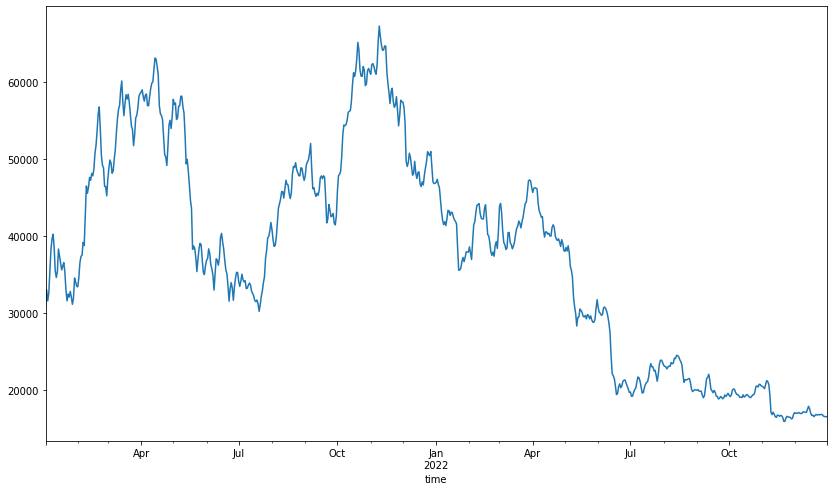

In [86]:
btc['price'].plot(figsize=(14, 8));

##2022 isn't a good year to invest in BTC!

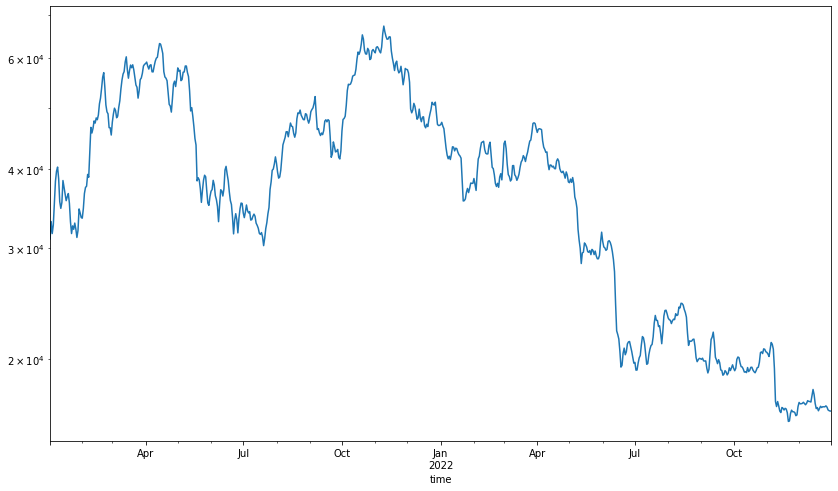

In [88]:
# on log scale

btc['price'].plot(logy=True,
                  figsize=(14,8));

#Create a df containing 5 coins

In [89]:
# Take a look at what coins we have, in USD

for item in Cryptocurrencies().find_crypto_pairs()['id'].tolist():
  if 'USD' in item:
    print(item)

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
NEAR-USD
C98-USD
BADGER-USDT
AST-USD
INDEX-USDT
OP-USDT
KNC-USD
1INCH-USD
HFT-USD
GHST-USD
ZRX-USD
MONA-USD
MASK-USD
LIT-USD
GUSD-USD
CVC-USD
SYLO-USDT
APE-USD
KSM-USDT
ATOM-USD
HOPR-USD
OMG-USD
CBETH-USD
COVAL-USDT
COMP-USD
BOBA-USDT
LTC-USD
DDX-USD
SHIB-USDT
SNX-USD
DYP-USDT
DOT-USDT
FIDA-USDT
SUPER-USDT
MCO2-USDT
XLM-USD
ZEN-USD
BICO-USDT
AAVE-USD
ICP-USD
STG-USDT
ENJ-USD
LOKA-USD
IMX-USD
SUKU-USD
MATH-USD
ADA-USDC
APE-USDT
MUSD-USD
XYO-USDT
GMT-USDT
MINA-USD
NU-USD
MANA-USD
LPT-USD
VGX-USD
OCEAN-USD
XLM-USDT
ATOM-USDT
IMX-USDT
CVC-USDC
MEDIA-USD
USDC-EUR
SUKU-USDT
FIS-USD
POLS-USDT
DOGE-USDT
STX-USDT
ALCX-USDT
XRP-USD
ENS-USD
CELR-USD
PAX-USDT
SHIB-USD
FX-USD
JASMY-USD
CRO-USDT
YFI-USD
BAND-USD
PRQ-USDT
GNO-USD
RLC-USD
CRV-USD
BIT-USDT
AUDIO-USD
ENS-USDT
SHPING-USD
AUCTION-USD
AVT-USD
MDT-USD
USDT-GBP
IOTX-USD
ADA-USD
ASM-USD
QNT-USDT
FLOW-USD
SOL-USD
REQ-USD
PAX-USD
RAD-USD
FORT-USD
MEDIA-USDT


In [103]:
coins2eval = ['BTC-USD', 'ETH-USD', 'GRT-USD', 'UPI-USD', 'XCN-USD']

coinpricesD = {}

for ticker in coins2eval:
  # import historical data
  tmp = HistoricalData(ticker, 60*60*24, '2021-01-01-00-00', '2022-12-31-00-00').retrieve_data()

  # take the average price
  avg = tmp[['low', 'high', 'open', 'close']].mean(axis=1)

  # store that price in the dictionary
  coinpricesD[ticker] = avg

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2021-01-01T00:00:00
Provisional End: 2021-10-28T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2021-10-28T00:00:00
Provisional End: 2022-08-24T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2022-08-24T00:00:00
Provisional End: 2023-06-20T00:00:00
Data for chunk 3 of 3 extracted
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2021-01-01T00:00:00
Provisional End: 2021-10-28T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2021-10-28T00:00:00
Provisional End: 2022-08-24T00:00:00
Data

In [104]:
coinpricesD

{'BTC-USD': time
 2021-01-02    30994.5500
 2021-01-03    33030.5400
 2021-01-04    31611.9550
 2021-01-05    32610.4150
 2021-01-06    35313.9275
                  ...    
 2022-12-27    16792.0900
 2022-12-28    16618.8300
 2022-12-29    16575.3775
 2022-12-30    16550.9025
 2022-12-31    16556.8100
 Length: 729, dtype: float64, 'ETH-USD': time
 2021-01-02     752.6750
 2021-01-03     885.2175
 2021-01-04    1019.5350
 2021-01-05    1064.4750
 2021-01-06    1147.5075
                 ...    
 2022-12-27    1217.9950
 2022-12-28    1198.9300
 2022-12-29    1195.3175
 2022-12-30    1195.2275
 2022-12-31    1198.3625
 Length: 729, dtype: float64, 'GRT-USD': time
 2021-01-02    0.340875
 2021-01-03    0.311450
 2021-01-04    0.313675
 2021-01-05    0.320375
 2021-01-06    0.356375
                 ...   
 2022-12-27    0.059500
 2022-12-28    0.057600
 2022-12-29    0.055350
 2022-12-30    0.054925
 2022-12-31    0.055400
 Length: 729, dtype: float64, 'UPI-USD': time
 2022-02-08    0.135

In [105]:
coinprices = pd.DataFrame(coinpricesD)

In [106]:
coinprices

,BTC-USD,ETH-USD,GRT-USD,UPI-USD,XCN-USD
time,,,,,
2021-01-02,30994.5500,752.6750,0.340875,NaN,NaN
2021-01-03,33030.5400,885.2175,0.311450,NaN,NaN
2021-01-04,31611.9550,1019.5350,0.313675,NaN,NaN
2021-01-05,32610.4150,1064.4750,0.320375,NaN,NaN
2021-01-06,35313.9275,1147.5075,0.356375,NaN,NaN
...,...,...,...,...,...
2022-12-27,16792.0900,1217.9950,0.059500,NaN,0.014770
2022-12-28,16618.8300,1198.9300,0.057600,NaN,0.013992
2022-12-29,16575.3775,1195.3175,0.055350,NaN,0.012743


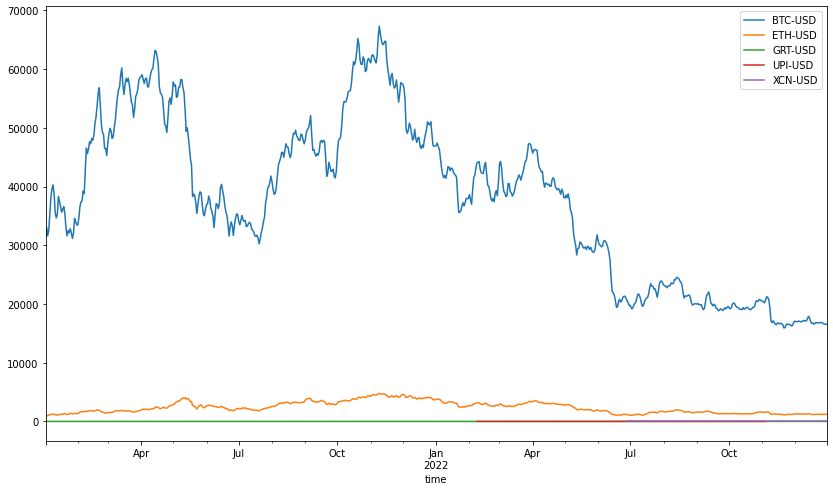

In [107]:
coinprices.plot(figsize=(14,8));

##Bitcoins is so wild, need to scale them.

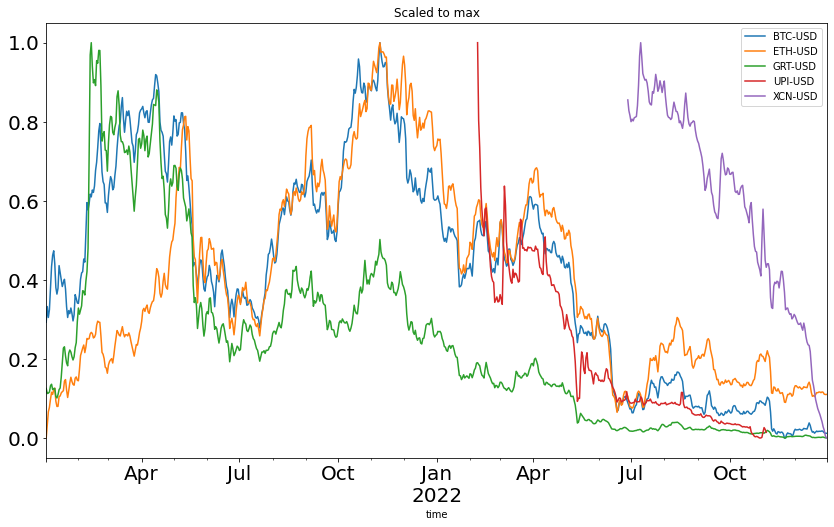

In [115]:
coinpricesScaled = (coinprices - coinprices.min()) / (coinprices.max() - coinprices.min())

coinpricesScaled.plot( title = 'Scaled to max',
                      fontsize = 20,
                      figsize=(14, 8));

##So UPI and XCN are newly launched in 2022.

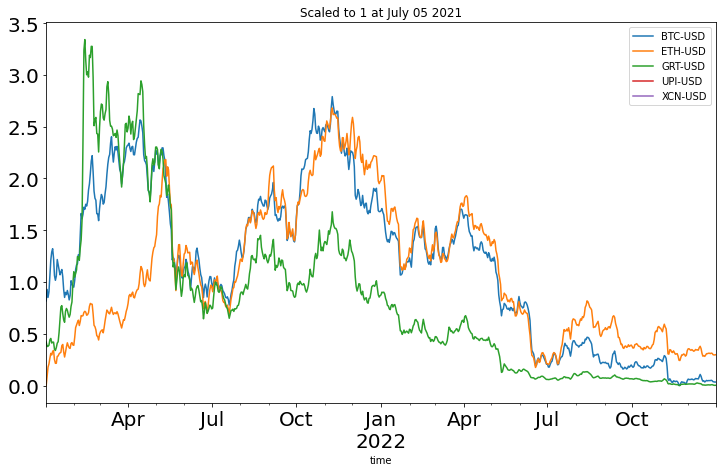

In [109]:
# We can also pick a date, and scale the price according to that date (1)

coinpricesScaled = (coinprices - coinprices.min()) / (coinprices.loc['2021-07-05'].values[:] - coinprices.min())

coinpricesScaled.plot(title = 'Scaled to 1 at July 05 2021',
                      fontsize = 20,
                      figsize=(12, 7));


In [110]:
coinprices.loc['2021-07-05']

BTC-USD    34357.380000
ETH-USD     2251.262500
GRT-USD        0.738425
UPI-USD             NaN
XCN-USD             NaN
Name: 2021-07-05 00:00:00, dtype: float64

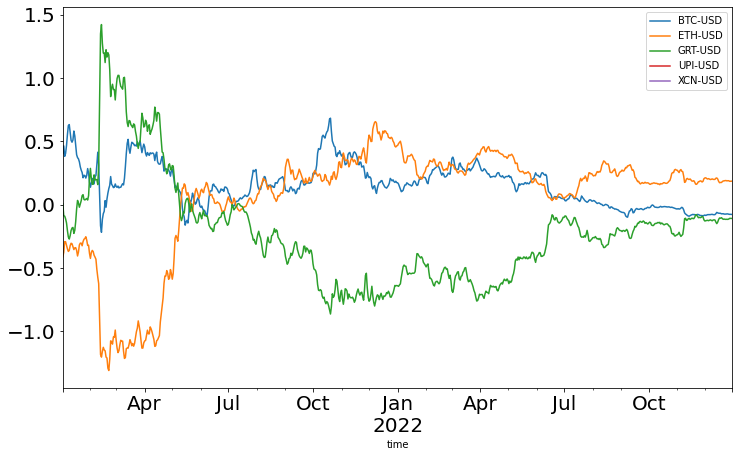

In [111]:
# Now center it so that on each day, the average across the 5 crypto prices is 0

coinpricesScaledCentered = coinpricesScaled.sub(coinpricesScaled.mean(axis=1), axis=0)
coinpricesScaledCentered.plot(fontsize = 20, figsize=(12, 7))

#Dimensionality reduction by PCA

In [112]:
coinprices.corr()

,BTC-USD,ETH-USD,GRT-USD,UPI-USD,XCN-USD
BTC-USD,1.000000,0.760679,0.810316,0.934171,0.813158
ETH-USD,0.760679,1.000000,0.347945,0.896473,0.451171
GRT-USD,0.810316,0.347945,1.000000,0.951520,0.840672
UPI-USD,0.934171,0.896473,0.951520,1.000000,0.925666
XCN-USD,0.813158,0.451171,0.840672,0.925666,1.000000


In [113]:
coinpricesScaled.corr()


,BTC-USD,ETH-USD,GRT-USD,UPI-USD,XCN-USD
BTC-USD,1.000000,0.760679,0.810316,NaN,NaN
ETH-USD,0.760679,1.000000,0.347945,NaN,NaN
GRT-USD,0.810316,0.347945,1.000000,NaN,NaN
UPI-USD,NaN,NaN,NaN,NaN,NaN
XCN-USD,NaN,NaN,NaN,NaN,NaN


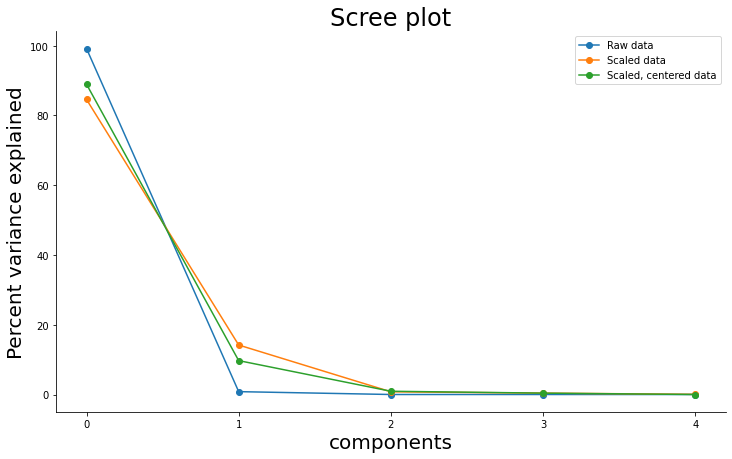

In [127]:
# PCA
# Need to drop NAN for PCA

pca = PCA()
pca.fit(coinprices.dropna())

pcaS = PCA()
pcaS.fit(coinpricesScaled.dropna())

coinpricesScaledCentered = coinpricesScaled.sub(coinpricesScaled.mean(axis=1), axis=0)
pcaM = PCA()
pcaM.fit(coinpricesScaledCentered.dropna())

fig, ax = plt.subplots(figsize=(12, 7))


plt.plot(100*pca.explained_variance_ratio_, 'o-', label='Raw data')
plt.plot(100*pcaS.explained_variance_ratio_, 'o-', label='Scaled data')
plt.plot(100*pcaM.explained_variance_ratio_, 'o-', label='Scaled, centered data')
plt.xlabel('components', fontsize=20)
plt.xticks(range(pca.n_components_))
plt.ylabel('Percent variance explained', fontsize=20)
plt.legend()
plt.title('Scree plot', fontsize=24)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##It seems that one factor could explain the crypto market.

#What happens if we invest by DCA (dollar-cost averaging)? Do a simulation to figure it out!

##First simulate fixed DCA
Here we invest a fixed amount every day.

In [119]:
dailyInvest = 10

# which coin to invest in
whichCoin = 'BTC-USD'

# Initialize the investment amount
euroInvest = 0
coinInvest = 0

# loop through days
for day in range(coinprices.shape[0]):

  # buy coin
  coin = dailyInvest / coinprices[whichCoin][day]

  # add to the totals
  euroInvest += dailyInvest
  coinInvest +=coin

# Compute the final value in euros of the investment
euroAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f'Total euro invested: ${euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} purchased: {coinInvest:.7f}')
print(f'End result: ${euroAtEnd:,.2f}')

Total euro invested: $7,290.00
Total BTC purchased: 0.2268573
End result: $3,756.03


##Oh no, we're in crypto bear market!




##Variable DCA
Here we invest more if the price goes down and invest less if the price is high.

In [121]:
dailyInvestUp = 7
dailyInvestDown = 15

# which coin to invest in
whichCoin = 'BTC-USD'

# Initialize the investment amount
euroInvest = 0
coinInvest = 0

# loop through days
for day in range(1, coinprices.shape[0]):
  # buy coin
  if coinprices[whichCoin][day] > coinprices[whichCoin][day-1]: # Price went up
    coin = dailyInvestUp / coinprices[whichCoin][day]
    euroInvest += dailyInvestUp
  else:
    coin = dailyInvestDown / coinprices[whichCoin][day]
    euroInvest += dailyInvestDown

  # add to the totals
  euroInvest += dailyInvest
  coinInvest +=coin

# Compute the final value in euros of the investment
euroAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f'Total euro invested: ${euroInvest:,.2f}')
print('\n')
print(f'Total {whichCoin[:-4]} purchased: {coinInvest:.7f}')
print('\n')
print(f'End result: ${euroAtEnd:,.2f}')

Total euro invested: $15,400.00


Total BTC purchased: 0.2552731


End result: $4,226.51


##Proportional DCA
If the price goes up, we invest a fixed amount, but if it drops, then we invest according to the percent change.

In [122]:
dailyInvest = 10

# which coin to invest in
whichCoin = 'BTC-USD'

# Initialize the investment amount
euroInvest = 0
coinInvest = 0

pctchng = [0] * coinprices.shape[0]

# loop through days
for day in range(1, coinprices.shape[0]):
  # compute the percent change from the previous day
  pctchng[day] = 100 * (coinprices[whichCoin][day] - coinprices[whichCoin][day-1]) / coinprices[whichCoin][day]
  # buy coin
  if pctchng[day] > 0: # Price went up   
    toInvest = dailyInvest
  else:
    toInvest = dailyInvest * -pctchng[day]

  coin = toInvest / coinprices[whichCoin][day]
  # add to the totals
  euroInvest += toInvest
  coinInvest +=coin

# Compute the final value in euros of the investment
euroAtEnd = coinInvest*coinprices[whichCoin][-1]

print(f'Total euro invested: ${euroInvest:,.2f}')
print('\n')
print(f'Total {whichCoin[:-4]} purchased: {coinInvest:.7f}')
print('\n')
print(f'End result: ${euroAtEnd:,.2f}')

Total euro invested: $11,504.14


Total BTC purchased: 0.3504097


End result: $5,801.67


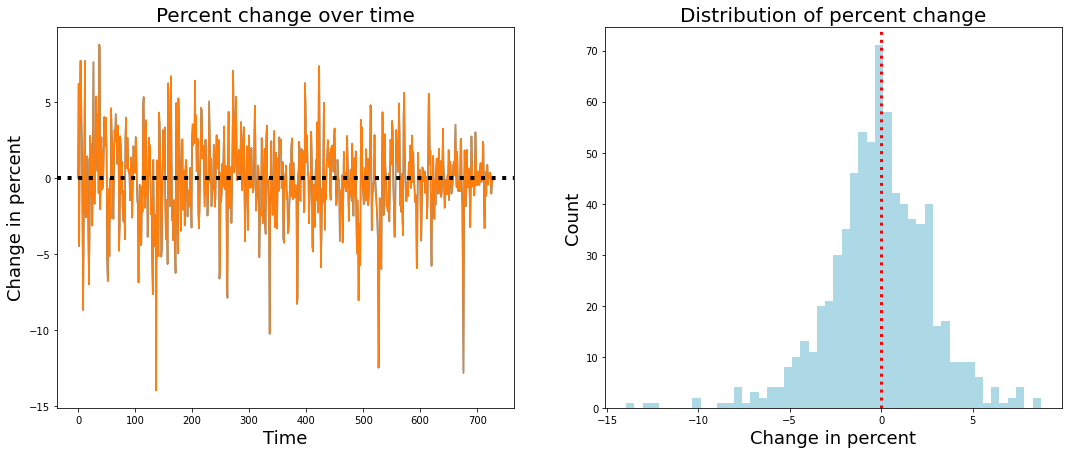

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(pctchng)
ax[0].plot(pctchng)
ax[0].axhline(0, c='k', ls=':', lw=4)
ax[0].set_xlabel('Time', fontsize=18)
ax[0].set_ylabel('Change in percent', fontsize=18)
ax[0].set_title('Percent change over time', fontsize=20)

ax[1].hist(pctchng, bins=50, color='lightblue')
ax[1].axvline(x=0, ls=':', c='r', lw=3)
ax[1].set_xlabel('Change in percent', fontsize=18)
ax[1].set_ylabel('Count', fontsize=18)
ax[1].set_title('Distribution of percent change', fontsize=20)

plt.show()

##Bitcoin definitely fluctuates a lot!

#Now take a look at how other coins performed.

In [128]:
dailyInvest = 10

# Initialize the investments (coin: amount)
euroInvest = {}
coinInvest = {}

# Loop through days
for day in range(coinprices.shape[0]):
  # loop over all of the coins
  for coinName in coins2eval:
    # initialize the investment amounts
    if day == 0:
      euroInvest[coinName] = 0
      coinInvest[coinName] = 0
    # how much coin did we buy on this day
    coin = dailyInvest / coinprices[coinName][day]

    if np.isnan(coin): continue 

    # add to the totals
    euroInvest[coinName] += dailyInvest
    coinInvest[coinName] += coin

Now print out the results

In [129]:
for coinName in coins2eval:
  # how much money
  eurosAtEnd = coinInvest[coinName]*coinprices[coinName][-1]
  # print it out, and align the lines nicely
  print(f'{coinName[:-4]:>7}: ${euroInvest[coinName]:,.2f} \u21e8 ${eurosAtEnd:>9,.2f}') 

    BTC: $7,290.00 ⇨ $ 3,756.03
    ETH: $7,290.00 ⇨ $ 4,372.38
    GRT: $7,290.00 ⇨ $ 1,835.28
    UPI: $2,700.00 ⇨ $      nan
    XCN: $1,870.00 ⇨ $   438.84
